<a href="https://colab.research.google.com/github/sexymonster/Reinforcement-Learning/blob/main/1108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install gym_anytrading

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 171 kB 12.5 MB/s 


In [6]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [9]:
import random
import gym
import gym_anytrading
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import backend as K
import yfinance as yf
import tensorflow as tf
from pandas_datareader import data as pdr

In [10]:
yf.pdr_override()
df = pdr.get_data_yahoo("005930.KS", start = "2012-10-25").reset_index()
df.to_csv("samsung.csv", index = False)
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-10-25,25920.0,26440.0,25820.0,26440.0,21155.257812,11881100
1,2012-10-26,26120.0,26240.0,25740.0,25740.0,20595.173828,13793850
2,2012-10-29,25960.0,25980.0,25580.0,25980.0,20787.197266,11448050
3,2012-10-30,25980.0,26080.0,25840.0,25960.0,20771.195312,6643850
4,2012-10-31,26120.0,26240.0,25980.0,26200.0,20963.232422,10604850


In [11]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [12]:
df.set_index("Date", inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-10-25,25920.0,26440.0,25820.0,26440.0,21155.257812,11881100
2012-10-26,26120.0,26240.0,25740.0,25740.0,20595.173828,13793850
2012-10-29,25960.0,25980.0,25580.0,25980.0,20787.197266,11448050
2012-10-30,25980.0,26080.0,25840.0,25960.0,20771.195312,6643850
2012-10-31,26120.0,26240.0,25980.0,26200.0,20963.232422,10604850


In [13]:
env = gym.make("stocks-v0", df=df, frame_bound = (10,100), window_size = 5)

/usr/local/lib/python3.7/dist-packages/gym/utils/passive_env_checker.py:32: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
  "A Box observation space has an unconventional shape (neither an image, nor a 1D vector). "
/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: I

In [15]:
env.signal_features # [price, change in price]

array([[ 2.594e+04,  0.000e+00],
       [ 2.654e+04,  6.000e+02],
       [ 2.682e+04,  2.800e+02],
       [ 2.698e+04,  1.600e+02],
       [ 2.724e+04,  2.600e+02],
       [ 2.700e+04, -2.400e+02],
       [ 2.682e+04, -1.800e+02],
       [ 2.690e+04,  8.000e+01],
       [ 2.698e+04,  8.000e+01],
       [ 2.710e+04,  1.200e+02],
       [ 2.662e+04, -4.800e+02],
       [ 2.614e+04, -4.800e+02],
       [ 2.664e+04,  5.000e+02],
       [ 2.728e+04,  6.400e+02],
       [ 2.768e+04,  4.000e+02],
       [ 2.834e+04,  6.600e+02],
       [ 2.874e+04,  4.000e+02],
       [ 2.808e+04, -6.600e+02],
       [ 2.832e+04,  2.400e+02],
       [ 2.826e+04, -6.000e+01],
       [ 2.828e+04,  2.000e+01],
       [ 2.812e+04, -1.600e+02],
       [ 2.860e+04,  4.800e+02],
       [ 2.860e+04,  0.000e+00],
       [ 2.910e+04,  5.000e+02],
       [ 2.908e+04, -2.000e+01],
       [ 2.960e+04,  5.200e+02],
       [ 2.982e+04,  2.200e+02],
       [ 2.952e+04, -3.000e+02],
       [ 2.980e+04,  2.800e+02],
       [ 3

In [19]:
import matplotlib.pyplot as plt

In [21]:
env.action_space

Discrete(2)

info {'total_reward': 5300.0, 'total_profit': 0.8367194791891538, 'position': 0}


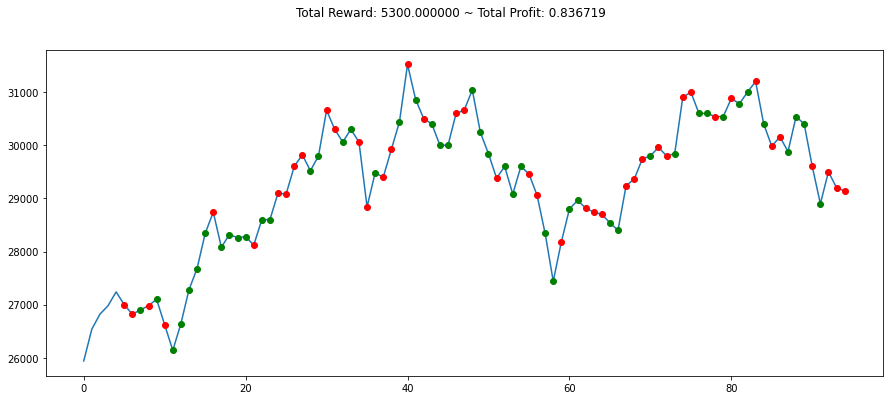

In [29]:
state = env.reset()
while True:
  action = env.action_space.sample()
  n_state, reward, done, info = env.step(action)
  if done:
    print("info", info)
    break
    
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [5]:
if __name__ == "__main__":
    env = gym.make('CartPole-v1')
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    # agent.load("./save/cartpole-ddqn.h5")
    done = False
    batch_size = 32

In [6]:
    print(action_size)

2


In [15]:
random.randrange(action_size)

1

In [16]:
state_size = 3
action_size = 3
learning_rate = 0.001

model = Sequential()
model.add(Dense(24, input_dim=state_size, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(action_size, activation='linear'))
model.compile(loss="mse",
              optimizer=Adam(lr=learning_rate))

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [17]:
act_values = model.predict(2)
np.argmax(act_values[0]) 

IndexError: ignored